**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Data Preprocessing

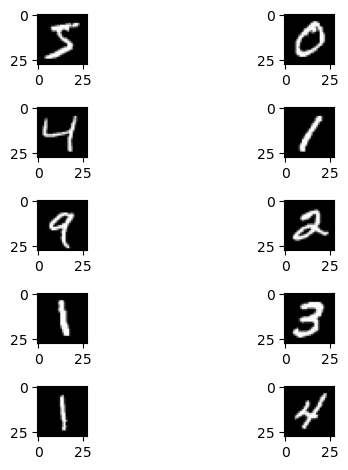

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

# Build CNN Model

In [3]:
from keras.optimizers import Adam
from keras.utils import to_categorical

x_train /= 255
x_test /=255

# Define number of classes before initializing the model
num_classes = 10

model = model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Conv layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling layer
    Dropout(0.25),  # Dropout layer
    Flatten(),  # Flatten layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs

'''



batch_size = 64
num_classes = 10
epochs = 5

def build_model(optimizer):
     '''
      Define a sequential model with categorical cross entropy as loss function consisting
      2 convolution and 2 pooling layers with relu as activation function followed by
      droput -> flatten -> dense -> dropout -> dense

      Convolution layer - (kernel size = (3*3))
      Pooling layer - (pool size = (2*2))

     '''

  #****** INSERT MODEL CODE HERE ******
     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

     return model 

#**** call build model with ADAM and ADAGRAD Optimizer ****

model = build_model(Adam())
plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 

Epoch 1/5
938/938 [==============================] - 10s 11ms/step - loss: 0.2476 - accuracy: 0.9240 - val_loss: 0.0557 - val_accuracy: 0.9834
Epoch 2/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0874 - accuracy: 0.9743 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0692 - accuracy: 0.9782 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0304 - val_accuracy: 0.9908


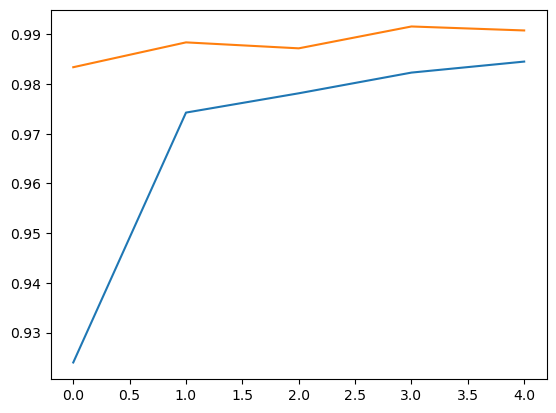

In [4]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_33845/1665422008.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "mnist.h5", save_format="h5")


1/1 [==============================] - 0s 36ms/step
Predicted label: 9


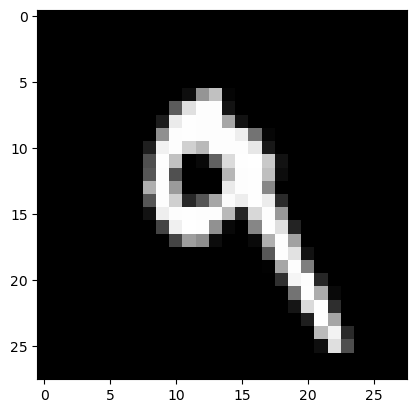

In [5]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
def predict_image(model, img):

  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****
  # Reshaping the image to match the input shape of the model (1, 28, 28, 1)
  img = img.reshape(1, 28, 28, 1)  # Adding batch dimension and channel dimension

  # Predict the class of the image
  prediction = model.predict(img)

  # Get the predicted class (argmax of prediction probabilities)
  predicted_label = np.argmax(prediction)

  # Print the predicted label
  print("Predicted label:", predicted_label)

m = load_model('mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
